# ODE in Quantum Mechanics (QM)

### Example: Quantum mechanics (ordinary differential equations, integrals, plotting):

Consider a particle of mass $m$ moving in a small space surrounded by impenetrable barriers.

The potential, $V(x)$, is given by the following piecewise function:

$   
V(x)= 
     \begin{cases}
       0, & 0 \leq x \leq a\\
       \infty, & \rm elsewhere\\
     \end{cases}
$

Since $V(x)$ is time-independent, the solutions to the Schrödinger equation can be separated into spatial and temporal wave functions:

$\Psi(x,t) = \psi_n(x)\,e^{-i\frac{E_n}{\hbar}t}$

As you know, the last term is called the "wiggle factor".

**The purpose of this problem is to find the stationary state solutions and sketch them using python tools**.

**(a)** Use python to make a plot of $V(x)$, labelling the regions of interest (i.e., the barriers and well). **Hint:** Note that $V(x)$ is a piece-wise function that can be $+\infty$ at the barriers, so you can define very large y-values for the barriers and then chop the y-axis when plotting to show just the bottom part.

**(b)** What is the wave function outside of the well? Why? Write down this solution.

**(c)** Write down the relevant ODE for the particle inside the well.

**(d)** Use sympy to solve the ODE for the particle inside the well. Write down the solution.

**(e)** Now you have stationary state solutions for inside and outside of the well, but the coefficients are still undefined. Write down the relevant boundary conditions (linear system of equations) to simplify the solution and to find an expression for $E_n$. **Hint:** Recall that $\psi$ needs to be continuous.

**(f)** Use sympy to normalise the resulting wave function, and write down the global solution. **Hint:** This involves calculating the integral of an analytical function.

**(g)** Inside a python function, plug some ansatz and make plots of the first $4$ stationary states, $\Psi(x,0)$, at time $t=0$. **Hint:** Note that these have to be energy eigenstates.

**(h)** Now append the wiggle factor, call the above function for different times, and create a movie with $4$ panels showing how the first $4$ stationary states $\Psi(x,t)$ evolve in time. Add a time stamp to the movies.

### Solution:

**(a)** Use python to make a plot of $V(x)$, labelling the regions of interest (i.e., the barriers and well). **Hint:** Note that $V(x)$ is a piece-wise function that can be $+\infty$ at the barriers, so you can define very large y-values for the barriers and then chop the y-axis when plotting to show just the bottom part.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Define piece-wise function
def f(x, a):
    if(0 <= x <= a):
        return 0
    else:
        return 10000

In [25]:
# Fix a = 2
a = 2

In [26]:
# Define axes

x = np.arange(-3, 5, 0.01)

# Empy list
y = []

for i in range(len(x)):
    y.append(f(x[i], a))

In [40]:
#print(x)
#print(y)

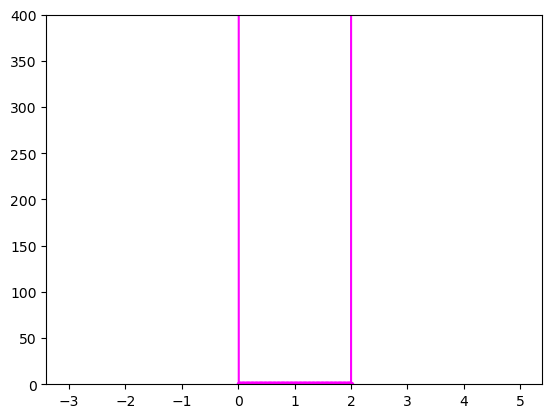

In [28]:
# For plotting
plt.plot(x, y, c='magenta', ls='-', marker='.')

plt.ylim(0,400)
plt.show()

**(b)** What is the wave function outside of the well? Why? Write down this solution.

$\psi =0$ in regions I and III.

**(c)** Write down the relevant ODE for the particle inside the well.

$\frac{-\hbar^2}{2m}\frac{d^2 \psi}{d x^2} = E\psi$

because $V(x)=0$.

**(d)** Use sympy to solve the ODE for the particle inside the well. Write down the solution.

In [29]:
import sympy as sp

# To see the outputs in latex format
from sympy.interactive import printing
printing.init_printing(use_latex = True)

$\frac{d^2}{d x^2}\psi + \frac{2mE}{\hbar^2}\psi=0$

In terms of the wavenumber: $k^2=\frac{2mE}{\hbar^2}$ (eq 1.)

$\frac{d^2}{d x^2}\psi + k^2\psi=0$

In [30]:
# We define symbols for variables and functions:

# For variable x:
x, k = sp.symbols('x, k')

# For function f(x):
y = sp.Function('y')

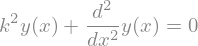

In [31]:
# We define the ODE:

diffeq = sp.Eq(y(x).diff(x,2) + k**2*y(x), 0)

display(diffeq)

In [32]:
# Solution to the ODE:

result = sp.dsolve(diffeq, y(x))

display(result)

Then, the solution is harmonic:

$\psi(x) = C'_1\,\cos(kx)+ C'_2\,\sin(kx)$

**(e)** Now you have stationary state solutions for inside and outside of the well, but the coefficients are still undefined. Write down the relevant boundary conditions (linear system of equations) to simplify the solution and to find an expression for $E_n$. **Hint:** Recall that $\psi$ needs to be continuous.

The relevant boundary conditions are:

$\psi(0)=0 \Rightarrow \psi(0) = C'_1\,\cos(0)+ C'_2\,\sin(0)=0 \Rightarrow C_1'=0$


$\psi(a)=0 \Rightarrow \psi(a) = C'_1\,\cos(ka)+ C'_2\,\sin(ka)=0 \Rightarrow \sin(ka)=0$

In [33]:
import numpy as np
import scipy.optimize as opt

In [34]:
x = np.arange(0, 20*np.pi, 0.01)

func = lambda x: np.sin(x)

y = func(x)

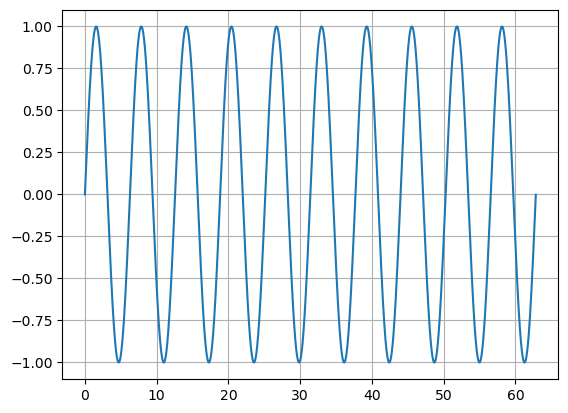

In [35]:
%matplotlib inline

plt.plot(x, y)
plt.grid()

In [36]:
x_0 = np.arange(0, 20*np.pi, np.pi)

In [37]:
roots_func = opt.fsolve(func, x_0)

print(roots_func/np.pi)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


Therefore, $ka=n\pi$, where $n$ is an integer. It cannot be zero because it results in a trivial solution.

For the energy:

$E=\frac{k^2\hbar^2}{2m}=\frac{n^2\pi^2\hbar^2}{2ma^2}$

**(f)** Use sympy to normalise the resulting wave function, and write down the global solution. **Hint:** This involves calculating the integral of an analytical function.

The resulting wave function is:

$\psi(x)= C'_2\,\sin\left(\frac{n\pi}{a}x\right)$


We want to normalise it:

$\int^a_0|\psi(x)|^2\,dx=1$

$(C'_2)^2\,\int^a_0\sin^2\left(\frac{n\pi}{a}x\right)=1$

In [38]:
from sympy import sin, pi

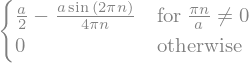

In [39]:
x, a, n = sp.symbols('x a n')

y = sp.integrate((sin(n*pi*x/a))**2, (x, 0, a))

display(sp.simplify(y))

Therefore:
$C'_2 = \sqrt{\frac{2}{a}}$

The resulting wave function is:

$\psi(x)= \sqrt{\frac{2}{a}}\,\sin\left(\frac{n\pi}{a}x\right)$

**(g)** Inside a python function, plug some ansatz and make plots of the first $4$ stationary states, $\Psi(x,0)$, at time $t=0$. **Hint:** Note that these have to be energy eigenstates.

In [41]:
def psi_function(a, n, x, t):
  
    psi_x = np.sqrt(2/a)*np.sin(n*np.pi*x/a)*np.cos(t)

    return psi_x

In [42]:
a=2

In [43]:
x = np.arange(0, 2.01, 0.01)

In [44]:
y1 = psi_function(a, 1, x, 0) # n=1

y2 = psi_function(a, 2, x, 0) # n=2

y3 = psi_function(a, 3, x, 0) # n=3

y4 = psi_function(a, 4, x, 0) # n=4

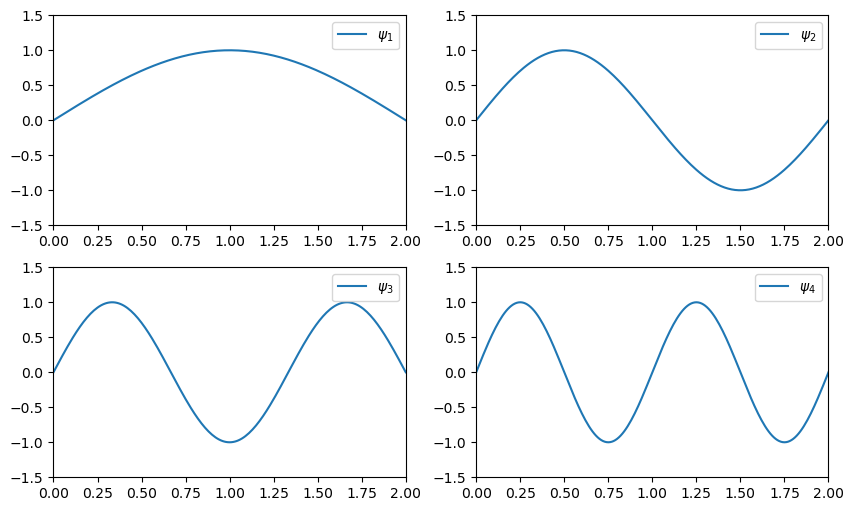

In [45]:
fig, ax = plt.subplots(2,2, figsize=(10,6))

ax[0][0].plot(x, y1,  label = r'$\psi_1$')
ax[0][1].plot(x, y2,  label = r'$\psi_2$')
ax[1][0].plot(x, y3,  label = r'$\psi_3$')
ax[1][1].plot(x, y4,  label = r'$\psi_4$')

ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

ax[0][0].set_xlim(0,2)
ax[0][1].set_xlim(0,2)
ax[1][0].set_xlim(0,2)
ax[1][1].set_xlim(0,2)

ax[0][0].set_ylim(-1.5,1.5)
ax[0][1].set_ylim(-1.5,1.5)
ax[1][0].set_ylim(-1.5,1.5)
ax[1][1].set_ylim(-1.5,1.5)

plt.show()

**(h)** Now append the wiggle factor, call the above function for different times, and create a movie with $4$ panels showing how the first $4$ stationary states $\Psi(x,t)$ evolve in time. Add a time stamp to the movies.

In [46]:
for i in np.arange(0,10,0.1):
    
    y1 = psi_function(a, 1, x, i) # n=1
    
    y2 = psi_function(a, 2, x, i) # n=2

    y3 = psi_function(a, 3, x, i) # n=3

    y4 = psi_function(a, 4, x, i) # n=4
    
    fig, ax = plt.subplots(2,2, figsize=(10,6))

    ax[0][0].plot(x, y1,  label = r'$\psi_1$')
    ax[0][1].plot(x, y2,  label = r'$\psi_2$')
    ax[1][0].plot(x, y3,  label = r'$\psi_3$')
    ax[1][1].plot(x, y4,  label = r'$\psi_4$')

    ax[0][0].legend()
    ax[0][1].legend()
    ax[1][0].legend()
    ax[1][1].legend()

    ax[0][0].set_xlim(0,2)
    ax[0][1].set_xlim(0,2)
    ax[1][0].set_xlim(0,2)
    ax[1][1].set_xlim(0,2)

    ax[0][0].set_ylim(-1.5,1.5)
    ax[0][1].set_ylim(-1.5,1.5)
    ax[1][0].set_ylim(-1.5,1.5)
    ax[1][1].set_ylim(-1.5,1.5)

    #plt.show()
    plt.savefig("wave_functions{:03f}.png".format(i))
    plt.close()

In [1]:
import glob
from PIL import Image

In [ ]:
images_in = "wave_functions**.png"

gif_image_out = "wave_functions.gif"

imgs = (Image.open(f) for f in sorted(glob.glob(images_in)))

img = next(imgs)

img.save(fp = gif_image_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)